<a href="https://colab.research.google.com/github/taskswithcode/probability_for_ml_notebooks/blob/main/MLEssence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook for What is any neural net really learning? **

This is a notebook link for the video [What is any neural net really learning?](https://youtu.be/LOh5-LTdosU)

#### Introduction
  Any neural net learns transformations from data. Any model performs two kinds of transformations
  - linear transformation
  - non linear transformation

  This notebook illustrates both these transformations.

##### Linear and non linear transformation of single input variable

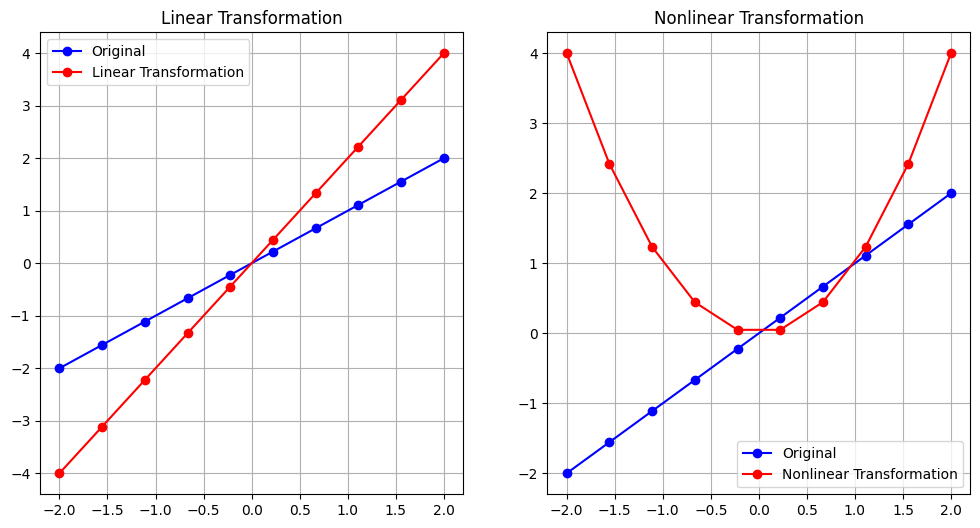

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of input values
x = np.linspace(-2, 2, 10)

# Define a linear transformation (multiply by 2)
y_linear = 2 * x

# Define a nonlinear transformation (square function)
y_nonlinear = x ** 2

# Plot the original values and the transformed values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x, x, 'bo-', label='Original')
ax[0].plot(x, y_linear, 'ro-', label='Linear Transformation')
ax[0].set_title("Linear Transformation")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x, x, 'bo-', label='Original')
ax[1].plot(x, y_nonlinear, 'ro-', label='Nonlinear Transformation')
ax[1].set_title("Nonlinear Transformation")
ax[1].legend()
ax[1].grid(True)

plt.show()


##### Linear transformation for two input variables

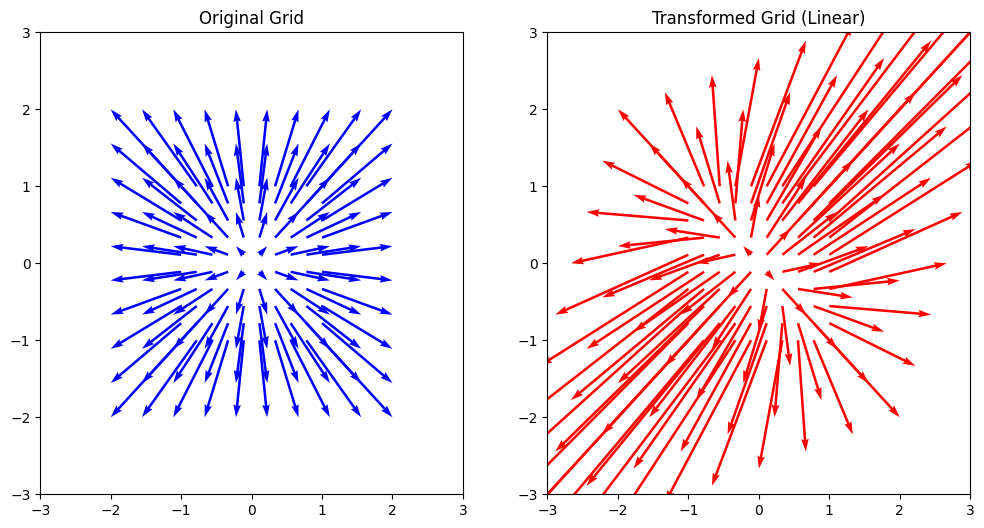

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grid of points
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)
U = X.copy()
V = Y.copy()

# Define a linear transformation (2x2 matrix)
A = np.array([[2, 1], [1, 2]])

# Apply the linear transformation to each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        vector = np.array([X[i, j], Y[i, j]])
        result = A @ vector
        U[i, j], V[i, j] = result[0], result[1]

# Plot the original grid and the transformed grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1)
ax[0].set_title("Original Grid")
ax[0].set_xlim([-3, 3])
ax[0].set_ylim([-3, 3])

ax[1].quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
ax[1].set_title("Transformed Grid (Linear)")
ax[1].set_xlim([-3, 3])
ax[1].set_ylim([-3, 3])

plt.show()


Non linear transformation for two input variables

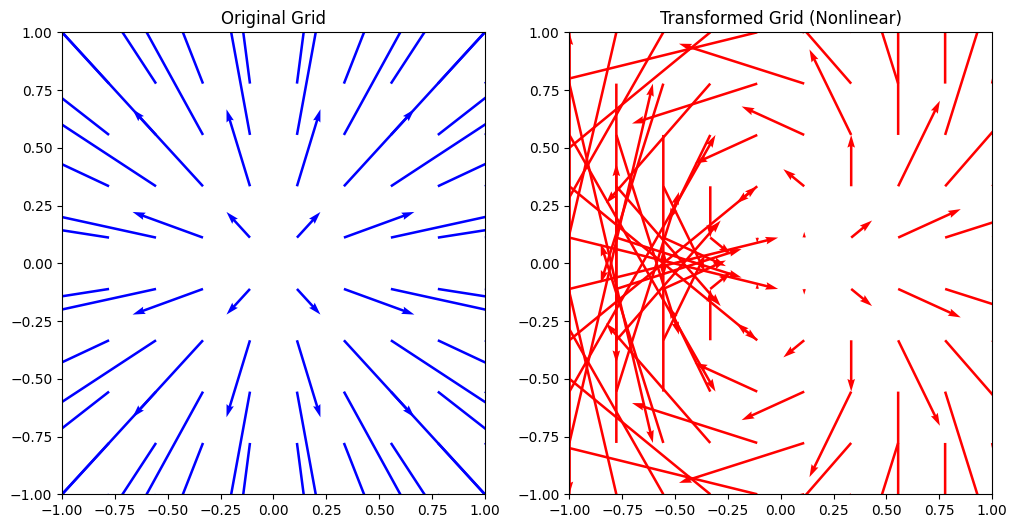

In [7]:
# Define a nonlinear transformation
def f(x, y):
    return x**2 - y**2, 2*x*y

# Apply the nonlinear transformation to each point in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        result = f(X[i, j], Y[i, j])
        U[i, j], V[i, j] = result[0], result[1]

# Plot the original grid and the transformed grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].quiver(X, Y, X, Y, color='blue', angles='xy', scale_units='xy', scale=1)
ax[0].set_title("Original Grid")
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-1, 1])

ax[1].quiver(X, Y, U, V, color='red', angles='xy', scale_units='xy', scale=1)
ax[1].set_title("Transformed Grid (Nonlinear)")
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-1, 1])

plt.show()


#### Additional notes
- [Andrej Karpahy's interactive demo for toy 1D regression model]()https://cs.stanford.edu/people/karpathy/convnetjs/demo/regression.html